<a href="https://colab.research.google.com/github/jcraigwood/Capstone-3-Regional-VG-Sales-Analysis/blob/main/Capstone3notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Connecting Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In this notebook I'll be looking at if the north american gaming market has a positive correlation other major foreign gaming markets.

I will also identify top performing publishers for each individual market for future contract recommendations.

Here is a link to my original data https://www.kaggle.com/gregorut/videogamesales



In [2]:
# Importing

import numpy as np
import pandas as pd
import seaborn as sns 
sns.set()
from scipy import stats
import matplotlib.pyplot as plt
df = pd.read_csv('/content/gdrive/My Drive/Thinkful/vgsales.csv')
df.head(10)


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,5959,Imagine: Makeup Artist,DS,2020.0,Simulation,Ubisoft,0.27,0.00,0.00,0.02,0.29
1,14393,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017.0,Role-Playing,Sega,0.00,0.00,0.03,0.00,0.03
2,16244,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017.0,Role-Playing,Sega,0.00,0.00,0.01,0.00,0.01
3,16441,Brothers Conflict: Precious Baby,PSV,2017.0,Action,Idea Factory,0.00,0.00,0.01,0.00,0.01
4,222,FIFA 17,PS4,2016.0,Sports,Electronic Arts,0.28,3.75,0.06,0.69,4.77
5,272,Uncharted 4: A Thief's End,PS4,2016.0,Shooter,Sony Computer Entertainment,1.30,2.07,0.18,0.65,4.20
6,352,Tom Clancy's The Division,PS4,2016.0,Shooter,Ubisoft,1.28,1.61,0.15,0.57,3.61
7,772,Far Cry: Primal,PS4,2016.0,Action,Ubisoft,0.59,1.16,0.06,0.33,2.13
8,847,Tom Clancy's The Division,XOne,2016.0,Shooter,Ubisoft,1.20,0.62,0.00,0.18,2.01
9,1028,Overwatch,PS4,2016.0,Shooter,Activision,0.64,0.68,0.14,0.26,1.73


In [ ]:
#shape - 16598 rows, 11 columns
df.shape

(16598, 11)

In [ ]:
df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [ ]:
#Fields include:
#Rank - Ranking of overall sales
#Name - The games name
#Platform - Platform of the games release (i.e. PC,PS4, etc.)
#Year - Year of the game's release
#Genre - Genre of the game
#Publisher - Publisher of the game
#NA_Sales - Sales in North America (in millions)
#EU_Sales - Sales in Europe (in millions)
#JP_Sales - Sales in Japan (in millions)
#Other_Sales - Sales in the rest of the world (in millions)
#Global_Sales - Total worldwide sales.

In [ ]:
#General info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [ ]:
#Our goal is to confirm whether or not north american markets have influence on the other two major foriegn markets. 
#What are our hypotheses going in?
#H1: There is a positive correlation between north american sales and european sales.
#H2: There is a positive correlation between north american sales and japanese sales.

In [ ]:
#Lets first filter out nulls
df_filtered = df.dropna()
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  float64
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [ ]:
#Let's check for some correlations 
df_filtered[['NA_Sales', 'EU_Sales', 'JP_Sales']].corr()


,NA_Sales,EU_Sales,JP_Sales
NA_Sales,1.000000,0.768923,0.451283
EU_Sales,0.768923,1.000000,0.436379
JP_Sales,0.451283,0.436379,1.000000


In [ ]:
# We can confirm correlation with these numbers.
# NAtoEU correlation is at 0.768923
# NAtoJP correlation is at 0.451283
# Seems to indicate a stronger influence on european markets, than japanese markets.

In [ ]:
# Lets first dive into NA to EU correlations.
stats.pearsonr(df_filtered['NA_Sales'], df_filtered['EU_Sales'])

(0.7689229927565607, 0.0)

Text(0.5, 1.0, 'NA Sales Vs. EU Sales')

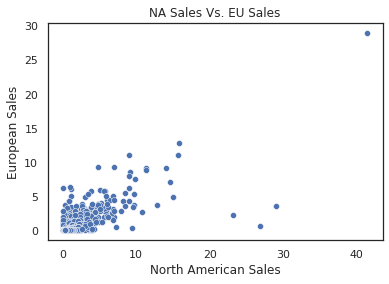

In [ ]:
#With p-value as <0.05 we can expect a significant correlation between these two variables.
#Lets visualize it.
sns.set_style("white")
sns.scatterplot(x="NA_Sales", y="EU_Sales", data=df_filtered)
plt.xlabel('North American Sales')
plt.ylabel('European Sales')
plt.title('NA Sales Vs. EU Sales')

In [ ]:
# Now lets dive into NA and JP correlations.
stats.pearsonr(df_filtered['NA_Sales'], df_filtered['JP_Sales'])

(0.451283498557966, 0.0)

Text(0.5, 1.0, 'NA Sales Vs. JP Sales')

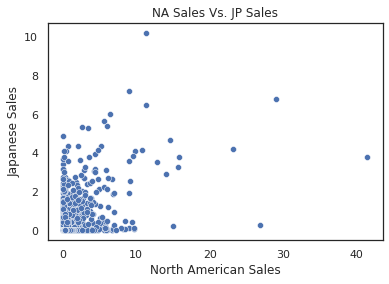

In [ ]:
#With p-value as <0.05 we can expect a significant correlation between these two variables.
#Lets visualize it.
sns.set_style("white")
sns.scatterplot(x="NA_Sales", y="JP_Sales", data=df_filtered)
plt.xlabel('North American Sales')
plt.ylabel('Japanese Sales')
plt.title('NA Sales Vs. JP Sales')

With the information provided from the Pearson R tests and Scatter plots, We can confirm a strong positive correlation between North American Sales and European Sales, as well as a moderate positive correlation between North American sales and Japanese Sales.


Now lets look into publishers.

In [ ]:
#Let's select video games from 2015 and onward.
recentyears = df_filtered['Year'] > 2014
recentyears.head(10)

0    True
1    True
2    True
3    True
4    True
5    True
6    True
7    True
8    True
9    True
Name: Year, dtype: bool

In [ ]:
recentyears_df = df_filtered.iloc[recentyears.values]
recentyears_df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,5959,Imagine: Makeup Artist,DS,2020.0,Simulation,Ubisoft,0.27,0.00,0.00,0.02,0.29
1,14393,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017.0,Role-Playing,Sega,0.00,0.00,0.03,0.00,0.03
2,16244,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017.0,Role-Playing,Sega,0.00,0.00,0.01,0.00,0.01
3,16441,Brothers Conflict: Precious Baby,PSV,2017.0,Action,Idea Factory,0.00,0.00,0.01,0.00,0.01
4,222,FIFA 17,PS4,2016.0,Sports,Electronic Arts,0.28,3.75,0.06,0.69,4.77


In [ ]:
 #Run some general info for the recentyears_df
 recentyears_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 960 entries, 0 to 971
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          960 non-null    int64  
 1   Name          960 non-null    object 
 2   Platform      960 non-null    object 
 3   Year          960 non-null    float64
 4   Genre         960 non-null    object 
 5   Publisher     960 non-null    object 
 6   NA_Sales      960 non-null    float64
 7   EU_Sales      960 non-null    float64
 8   JP_Sales      960 non-null    float64
 9   Other_Sales   960 non-null    float64
 10  Global_Sales  960 non-null    float64
dtypes: float64(6), int64(1), object(4)
memory usage: 90.0+ KB


In [ ]:
#Lets get a list of each publisher
print(recentyears_df.Publisher.unique())

['Ubisoft' 'Sega' 'Idea Factory' 'Electronic Arts'
 'Sony Computer Entertainment' 'Activision' 'Hello Games'
 'Namco Bandai Games' 'Bethesda Softworks' 'Level 5'
 'Take-Two Interactive' 'Nintendo' 'Capcom'
 'Warner Bros. Interactive Entertainment' 'Square Enix'
 'Microsoft Game Studios' 'Atlus' 'Codemasters' 'Deep Silver'
 'Konami Digital Entertainment' '505 Games' 'Tecmo Koei' 'GungHo'
 'Marvelous Interactive' 'Kadokawa Games' 'Nippon Ichi Software'
 'Telltale Games' 'Unknown' 'Nihon Falcom Corporation' 'Milestone S.r.l.'
 'PQube' 'Insomniac Games' 'Aksys Games' 'Nippon Columbia' 'Broccoli'
 'Aqua Plus' 'FuRyu' 'Focus Home Interactive' 'Alternative Software'
 'Milestone S.r.l' 'MLB.com' 'D3Publisher' 'Happinet'
 'Dusenberry Martin Racing' 'Paradox Interactive' 'Rocket Company'
 'Astragon' 'Screenlife' 'Introversion Software' 'Compile Heart' '5pb'
 'Avanquest' 'Atari' 'Microids' 'Koch Media' 'Rising Star Games'
 'dramatic create' 'Yeti' 'Sold Out' 'Marvelous Entertainment'
 'Nordic Gam

In [ ]:
#How many total publishers made the list for this selection of time.
recentyears_df.Publisher.nunique()

110

In [ ]:
#Identify the top selling publishers for NA market for this time period
print(recentyears_df.pivot_table(columns='Year',
               index='Publisher',
               values='NA_Sales',
               aggfunc=sum,
               margins=True).\
    sort_values(by='All', ascending=False).head(10))

Year                                    2015.0  2016.0  2017.0  2020.0     All
Publisher                                                                     
All                                     102.82   22.66     0.0    0.27  125.75
Electronic Arts                          17.62    3.64     NaN     NaN   21.26
Activision                               16.95    1.67     NaN     NaN   18.62
Warner Bros. Interactive Entertainment   10.02    1.37     NaN     NaN   11.39
Take-Two Interactive                      8.58    1.83     NaN     NaN   10.41
Nintendo                                  9.25    1.16     NaN     NaN   10.41
Ubisoft                                   4.89    3.85     NaN    0.27    9.01
Bethesda Softworks                        7.20    0.94     NaN     NaN    8.14
Sony Computer Entertainment               4.91    2.43     NaN     NaN    7.34
Microsoft Game Studios                    6.32    0.66     NaN     NaN    6.98


In [ ]:
#Identify the top selling publishers for EU market for this time period
print(recentyears_df.pivot_table(columns='Year',
               index='Publisher',
               values='EU_Sales',
               aggfunc=sum,
               margins=True).\
    sort_values(by='All', ascending=False).head(10))

Year                                    2015.0  2016.0  2017.0  2020.0     All
Publisher                                                                     
All                                      97.71   26.76     0.0     0.0  124.47
Electronic Arts                          21.14    6.91     NaN     NaN   28.05
Activision                               13.41    1.39     NaN     NaN   14.80
Ubisoft                                   6.16    4.38     NaN     0.0   10.54
Warner Bros. Interactive Entertainment    8.45    1.68     NaN     NaN   10.13
Nintendo                                  7.49    0.93     NaN     NaN    8.42
Bethesda Softworks                        6.84    0.99     NaN     NaN    7.83
Namco Bandai Games                        5.42    1.58     NaN     NaN    7.00
Sony Computer Entertainment               3.84    2.87     NaN     NaN    6.71
Take-Two Interactive                      4.26    0.62     NaN     NaN    4.88


In [ ]:
#Identify the top selling publishers for JP market for this time period
print(recentyears_df.pivot_table(columns='Year',
               index='Publisher',
               values='JP_Sales',
               aggfunc=sum,
               margins=True).\
    sort_values(by='All', ascending=False).head(10))

Year                          2015.0  2016.0  2017.0  2020.0    All
Publisher                                                          
All                            33.72   13.67    0.05     0.0  47.44
Nintendo                        8.57    1.17     NaN     NaN   9.74
Namco Bandai Games              5.03    2.34     NaN     NaN   7.37
Square Enix                     2.25    2.23     NaN     NaN   4.48
Capcom                          3.76    0.53     NaN     NaN   4.29
Level 5                         2.31    1.82     NaN     NaN   4.13
Tecmo Koei                      1.37    0.78     NaN     NaN   2.15
Konami Digital Entertainment    1.27    0.63     NaN     NaN   1.90
Sega                            0.76    0.45    0.04     NaN   1.25
mixi, Inc                       0.86     NaN     NaN     NaN   0.86


In [ ]:
#Identify the top selling publishers for global market for this time period
print(recentyears_df.pivot_table(columns='Year',
               index='Publisher',
               values='Global_Sales',
               aggfunc=sum,
               margins=True).\
    sort_values(by='All', ascending=False).head(10))

Year                                    2015.0  2016.0  2017.0  2020.0     All
Publisher                                                                     
All                                     264.44   70.90    0.05    0.29  335.68
Electronic Arts                          45.42   12.25     NaN     NaN   57.67
Activision                               35.63    3.67     NaN     NaN   39.30
Nintendo                                 27.08    3.47     NaN     NaN   30.55
Warner Bros. Interactive Entertainment   21.74    3.52     NaN     NaN   25.26
Ubisoft                                  12.79    9.76     NaN    0.29   22.84
Namco Bandai Games                       15.56    6.49     NaN     NaN   22.05
Bethesda Softworks                       16.44    2.25     NaN     NaN   18.69
Take-Two Interactive                     15.03    2.89     NaN     NaN   17.92
Sony Computer Entertainment              11.01    6.56     NaN     NaN   17.57


In [ ]:
#From these lists, we can confirm publishers like "Electronic Arts", "Activision", and "Warner Bros. Interactive Entertainment" are both prominent in the NA and EU Markets.
#However in the JP markets "Namco Bandai Games", "Square Enix", and "Capcom" seem to have more of a presence.
#The JP market is approximately 14% of the global market, while the NA and EU markets are 37% of the market each. (Almost 75% of the market is just NA and EU alone.)

Based off this analysis, my final recommendation is to focus on the NA and EU markets for new contracts, ideally working with Electronic Arts, Activision, and Warner Bros. Interactive Entertainment. 

We can confirm a strong positive correlation between North American Sales and European Sales, and this is likely due to cultural similarities. You can run similar marketing campaigns, and both markets are predominantly english speaking.

Nintendo, which isn't an independent contracting gaming company, is only producing games for their own platform. They currently dominate the JP market, possibly making it more difficult to break into the JP market.

With the NA and EU markets having such a strong correlation, and both being much larger than the JP market, there is higher potential for overall sales by trying to appeal to these markets.
